In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima_model import ARIMA

In [91]:
#Carregando dados
acao = pd.read_excel('FAcoes.xlsx')
cambio = pd.read_excel('FCambial.xlsx')

In [76]:
classe_acao = list(set(acao['Código']))
classe_cambio = list(set(cambio['Código']))

In [92]:
def trata_arquivos(df):
    dfs = []
    listcod = list(set(df['Código']))
    for i in listcod:
        df1 = df[df['Código'] == i].reset_index()
        k = df1[['Data', 'Cota']]
        k.rename({'Cota': df1.Código[0]}, axis=1, inplace=True)
        dfs.append(k)
    return dfs

In [93]:
df_acao = trata_arquivos(acao)
df_cambio = trata_arquivos(cambio)

C:\Users\luisg\AppData\Local\Temp\ipykernel_4684\21828839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k.rename({'Cota': df1.Código[0]}, axis=1, inplace=True)
C:\Users\luisg\AppData\Local\Temp\ipykernel_4684\21828839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k.rename({'Cota': df1.Código[0]}, axis=1, inplace=True)
C:\Users\luisg\AppData\Local\Temp\ipykernel_4684\21828839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [94]:
acao_dfs = pd.DataFrame()
for df in df_acao:
    if len(acao_dfs) == 0:
        acao_dfs = df
    else:
        acao_dfs = acao_dfs.merge(df, left_on='Data', right_on='Data')
acao_dfs

,Data,13424,13900
0,2023-11-30,5.109439,1016.156515
1,2023-11-29,5.072287,1005.501044
2,2023-11-28,5.079098,1008.480335
3,2023-11-27,5.061585,1004.261945
4,2023-11-24,5.066180,1002.119022
...,...,...,...
4269,2006-11-29,0.999914,173.144856
4270,2006-11-28,0.976940,170.129937
4271,2006-11-27,0.979755,170.145814
4272,2006-11-24,0.994760,171.047175


In [96]:
acao_dfs.set_index('Data', inplace=True)

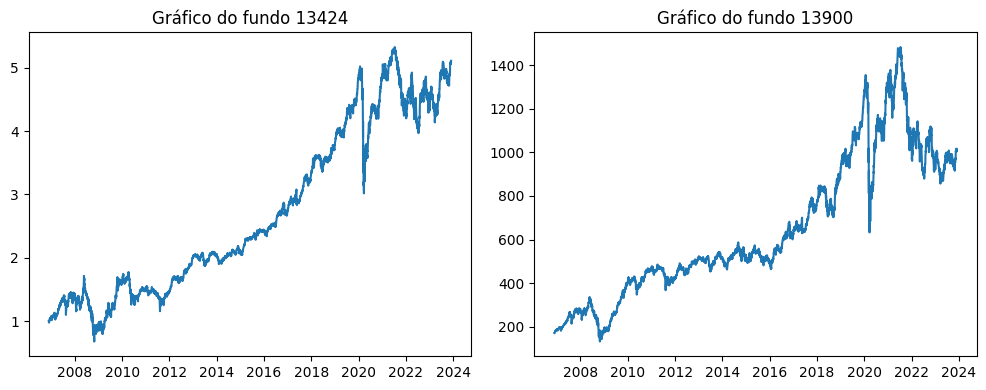

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plote a primeira coluna no primeiro subplot
axes[0].plot(acao_dfs[13424])
axes[0].set_title('Gráfico do fundo 13424')

# Plote a segunda coluna no segundo subplot
axes[1].plot(acao_dfs[13900])
axes[1].set_title('Gráfico do fundo 13900')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.savefig('retorno_acao.jpg')
# Exiba os gráficos
plt.show()


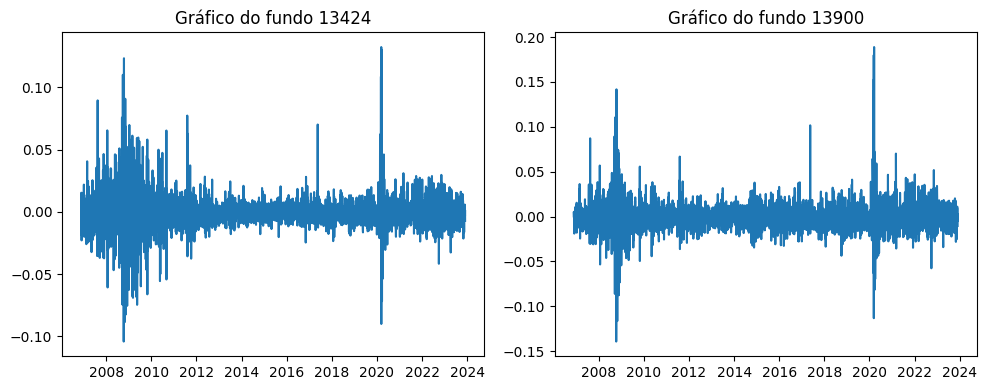

In [107]:

acao_est = acao_dfs.pct_change()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plote a primeira coluna no primeiro subplot
axes[0].plot(acao_est[13424])
axes[0].set_title('Gráfico do fundo 13424')

# Plote a segunda coluna no segundo subplot
axes[1].plot(acao_est[13900])
axes[1].set_title('Gráfico do fundo 13900')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.savefig('acao_estacionária.jpg')
# Exiba os gráficos
plt.show()


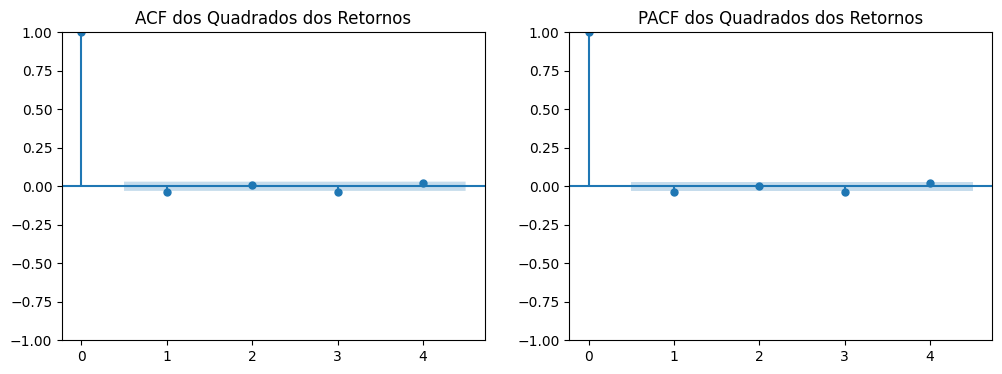

In [204]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf

dfacao1 = acao_est.drop(acao_est.columns.difference([13424]), axis=1).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(dfacao1, lags=4, alpha=0.05, ax=ax1)
plot_pacf(dfacao1, lags=4, alpha=0.05, ax=ax2)

ax1.set_title('ACF dos Quadrados dos Retornos')
ax2.set_title('PACF dos Quadrados dos Retornos')

plt.savefig('FACP_13424.png')
plt.show()

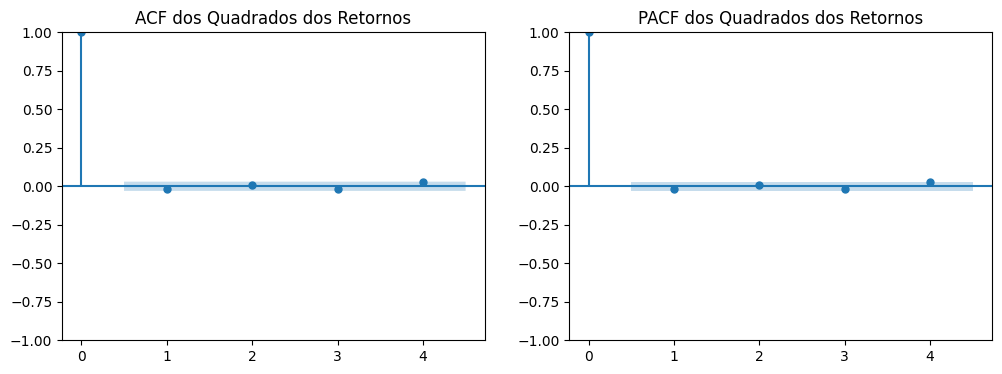

In [205]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf

dfacao2 = acao_est.drop(acao_est.columns.difference([13900]), axis=1).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(dfacao2, lags=4, alpha=0.05, ax=ax1)
plot_pacf(dfacao2, lags=4, alpha=0.05, ax=ax2)

ax1.set_title('ACF dos Quadrados dos Retornos')
ax2.set_title('PACF dos Quadrados dos Retornos')

plt.savefig('FACP_13900.png')
plt.show()

In [142]:
est = np.log(acao_dfs).pct_change().dropna()

In [161]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

result = adfuller(k)

# Exiba os resultados
print("Estatística ADF:", result[0])
print("Valor p:", result[1])
print("Valores Críticos:", result[4])

rolling_window = 20
rolling_mean = acao_est[13424].rolling(window=rolling_window).mean()
# Exiba a série temporal original e a média móvel
plt.plot(acao_est[13424], label='Original')
plt.plot(rolling_mean, label=f'Média Móvel ({rolling_window} dias)')
plt.legend()
plt.title('Série Temporal Original e Média Móvel')
plt.show()

LinAlgError: SVD did not converge

In [160]:
k = np.log((acao_dfs - acao_dfs.shift(1))/acao_dfs.shift(1))[13424].dropna()


c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


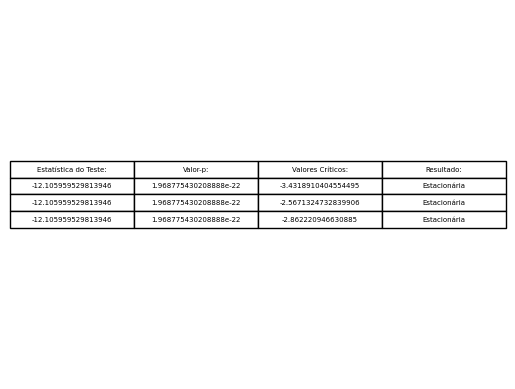

In [178]:
from statsmodels.tsa.stattools import adfuller

def phillips_perron_test(series):
    result = adfuller(series, autolag='AIC', regression='c')
    ppt = {'Estatística do Teste:': result[0],
    'Valor-p:': result[1],
    'Valores Críticos:': result[4],
    'Resultado:': 'Estacionária' if result[1] <= 0.05 else 'Não Estacionária'}
    return pd.DataFrame(ppt)


teste13424 = phillips_perron_test(acao_est[13424].dropna())

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=teste13424.values, colLabels=teste13424.columns, cellLoc = 'center', loc='center')

# Salvar o gráfico como uma imagem (por exemplo, PNG)
plt.savefig('est_13424.png', bbox_inches='tight', pad_inches=0.1)

# Exibir o gráfico
plt.show()

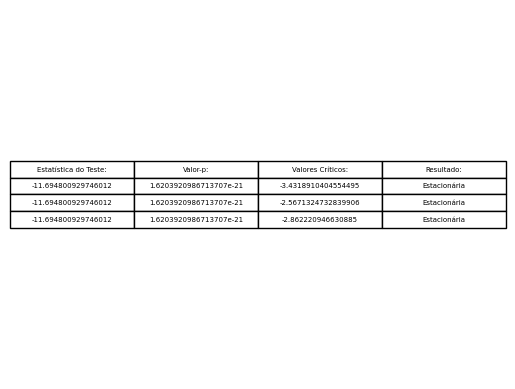

In [179]:
testeacao2 = phillips_perron_test(acao_est[13900].dropna())

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=testeacao2.values, colLabels=testeacao2.columns, cellLoc = 'center', loc='center')

# Salvar o gráfico como uma imagem (por exemplo, PNG)
plt.savefig('est_acao2.png', bbox_inches='tight', pad_inches=0.1)

# Exibir o gráfico
plt.show()

In [200]:
import statsmodels.api as sm
model_13424 = sm.tsa.ARIMA(acao_est[13424], order=(0,0,0)).fit()
model_13424.summary().as_text()

c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

'                               SARIMAX Results                                \n==============================================================================\nDep. Variable:                  13424   No. Observations:                 4274\nModel:                          ARIMA   Log Likelihood               12115.799\nDate:                Mon, 04 Dec 2023   AIC                         -24227.598\nTime:                        21:17:38   BIC                         -24214.877\nSample:                             0   HQIC                        -24223.104\n                               - 4274                                         \nCovariance Type:                  opg                                         \n==============================================================================\n                 coef    std err          z      P>|z|      [0.025      0.975]\n------------------------------------------------------------------------------\nconst         -0.0003      0.000     -1

In [201]:
model_13900 = sm.tsa.ARIMA(acao_est[13900], order=(0,0,0)).fit()
model_13900.summary()



c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  13900   No. Observations:                 4274
Model:                          ARIMA   Log Likelihood               11663.143
Date:                Mon, 04 Dec 2023   AIC                         -23322.285
Time:                        21:17:47   BIC                         -23309.565
Sample:                             0   HQIC                        -23317.792
                               - 4274                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -1.184      0.236      -0.001       0.000
sigma2         0.0002   1.69e-06    147.584      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):             74322.33
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             1.37
Prob(H) (two-sided):                  0.13   Kurtosis:                        23.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

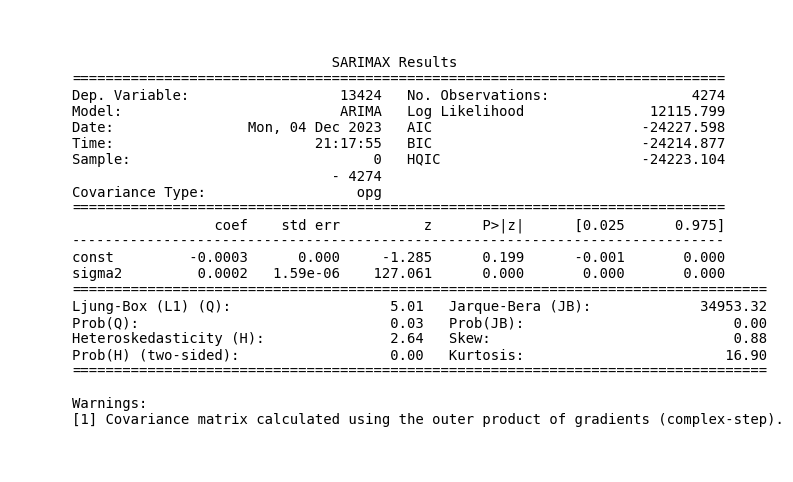

In [202]:
from io import BytesIO

resumo_texto = model_13424.summary().as_text()

fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.1, 0.9, resumo_texto, va='top', ha='left', fontsize=10, family='monospace')
ax.axis('off')

plt.savefig('modelo_13424.png', bbox_inches='tight', pad_inches=0.1)
# Exibir o gráfico ou salvar como imagem
plt.show()





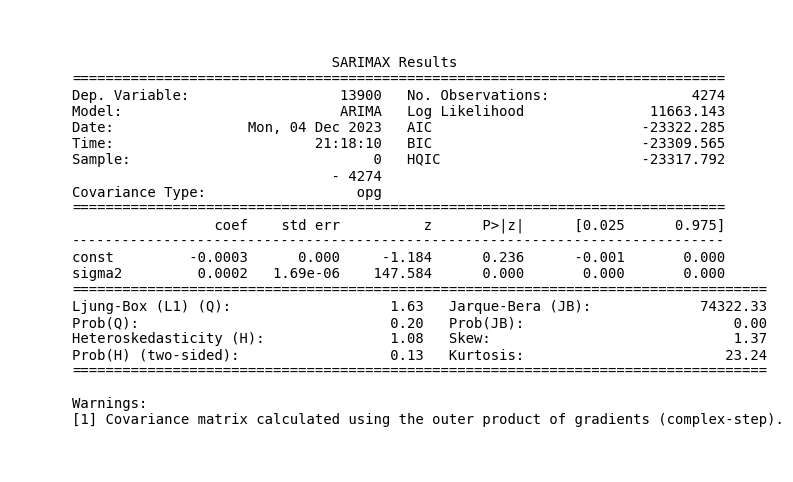

In [203]:
resumo_texto = model_13900.summary().as_text()

fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.1, 0.9, resumo_texto, va='top', ha='left', fontsize=10, family='monospace')
ax.axis('off')

plt.savefig('modelo_13900.png', bbox_inches='tight', pad_inches=0.1)
# Exibir o gráfico ou salvar como imagem
plt.show()

In [253]:
resto13424 = model_13424.resid
resto13900 = model_13900.resid

resto1 = resto13424.dropna()**2
resto2 = resto13900.dropna()**2

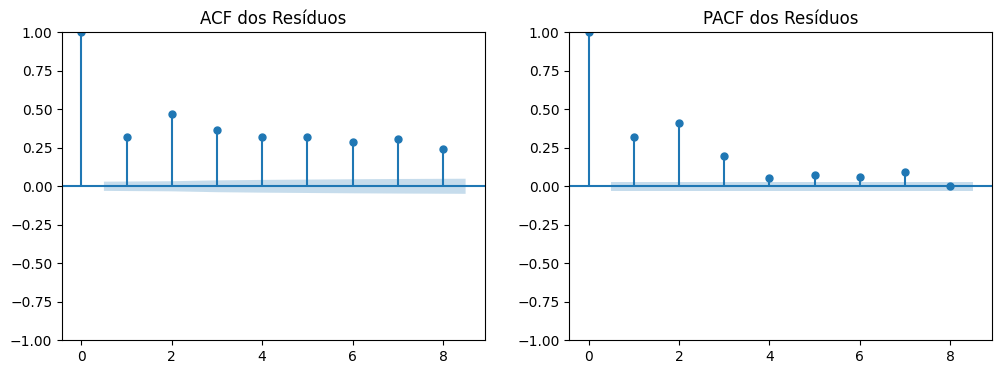

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(resto1**2, lags=8, alpha=0.05, ax=ax1)
plot_pacf(resto1**2, lags=8, alpha=0.05, ax=ax2)

ax1.set_title('ACF dos Resíduos')
ax2.set_title('PACF dos Resíduos')

plt.savefig('Resid13424.png')
plt.show()

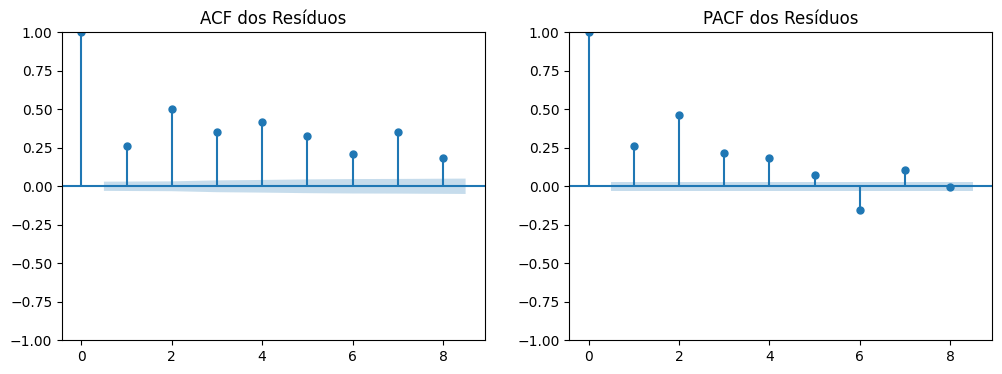

In [221]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(resto2**2, lags=8, alpha=0.05, ax=ax1)
plot_pacf(resto2**2, lags=8, alpha=0.05, ax=ax2)

ax1.set_title('ACF dos Resíduos')
ax2.set_title('PACF dos Resíduos')

plt.savefig('Resid13900.png')
plt.show()

c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.467e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

Iteration:      1,   Func. Count:      5,   Neg. LLF: -28239.322372512026
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -28239.32240134669
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
Resumo do Modelo GARCH:


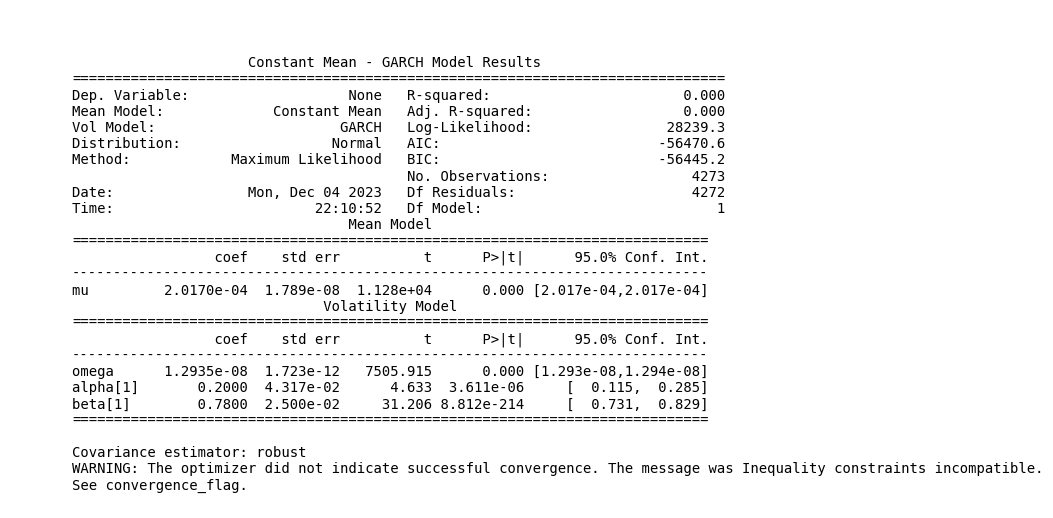

c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.382e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

Iteration:      1,   Func. Count:      5,   Neg. LLF: -27218.27545505556
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -27218.275496527647
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
Resumo do Modelo GARCH:


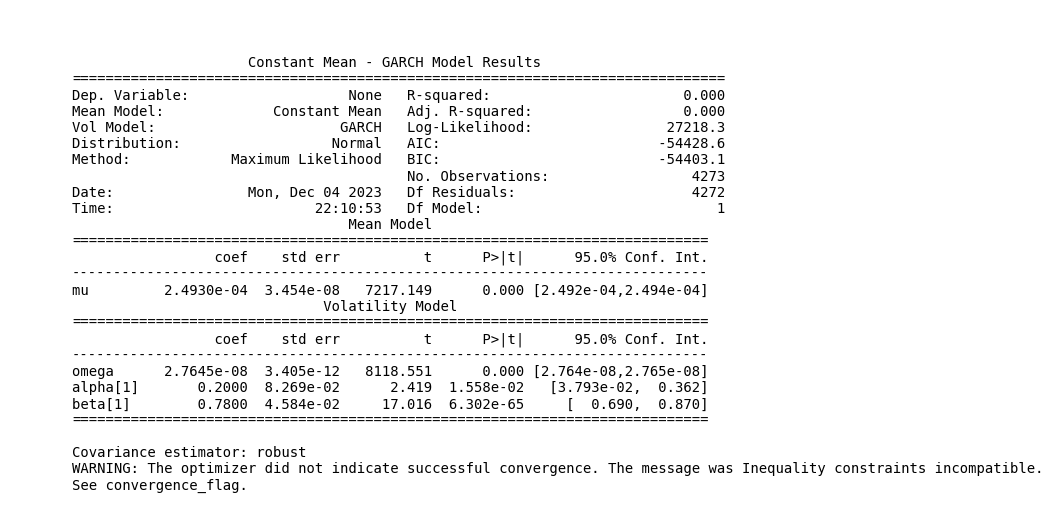

In [228]:
model_garch_1 = arch_model(resto1, vol='Garch', p=1, q=1)
model_garch_fit_1 = model_garch_1.fit()
print("Resumo do Modelo GARCH:")
resumo_texto = model_garch_fit_1.summary().as_text()

fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.1, 0.9, resumo_texto, va='top', ha='left', fontsize=10, family='monospace')
ax.axis('off')

plt.savefig('garch_13424.png', bbox_inches='tight', pad_inches=0.1)
# Exibir o gráfico ou salvar como imagem
plt.show()

model_garch_2 = arch_model(resto2, vol='Garch', p=1, q=1)
model_garch_fit_2 = model_garch_2.fit()
print("Resumo do Modelo GARCH:")
resumo_texto = model_garch_fit_2.summary().as_text()

fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.1, 0.9, resumo_texto, va='top', ha='left', fontsize=10, family='monospace')
ax.axis('off')

plt.savefig('garch_13900.png', bbox_inches='tight', pad_inches=0.1)
# Exibir o gráfico ou salvar como imagem
plt.show()

In [273]:
volatility_forecast_1 = model_garch_fit_1.forecast(horizon=365)

In [259]:
resto1.set_index('Data', inplace = True)

In [275]:
volatilidade_condicional_1

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.356,h.357,h.358,h.359,h.360,h.361,h.362,h.363,h.364,h.365
Data,,,,,,,,,,,,,,,,,,,,,
2006-11-23,0.000297,0.000315,0.000332,0.000348,0.000363,0.000377,0.00039,0.000402,0.000414,0.000425,...,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804


array([4273, 4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4283,
       4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294,
       4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305,
       4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316,
       4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327,
       4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338,
       4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349,
       4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360,
       4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371,
       4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382,
       4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393,
       4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404,
       4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415,
       4416, 4417, 4418, 4419, 4420, 4421, 4422, 44

In [291]:
ajuste = model_garch_fit_1

df = resto1['13424']
# Realizar projeção para os próximos 120 dias
projecao = ajuste.forecast(start=0, horizon=360)

# Extrair volatilidade condicional da projeção
volatilidade_condicional = np.sqrt(projecao.variance.dropna())

vol_1 = volatilidade_condicional.iloc[1]

(4273,)

In [296]:
resto1 = resto1.sort_index()

In [306]:
resto1.index[-1] + timedelta(360)

Timestamp('2024-11-23 00:00:00')

In [308]:
lista_de_datas = [resto1.index[-1] + timedelta(i) for i in range(360)]

In [316]:
ajuste = model_garch_fit_1
# Realizar projeção para os próximos 120 dias
projecao = ajuste.forecast(start=0, horizon=360)

# Extrair volatilidade condicional da projeção
volatilidade_condicional = np.sqrt(projecao.variance.dropna())

vol_1 = volatilidade_condicional.iloc[1]

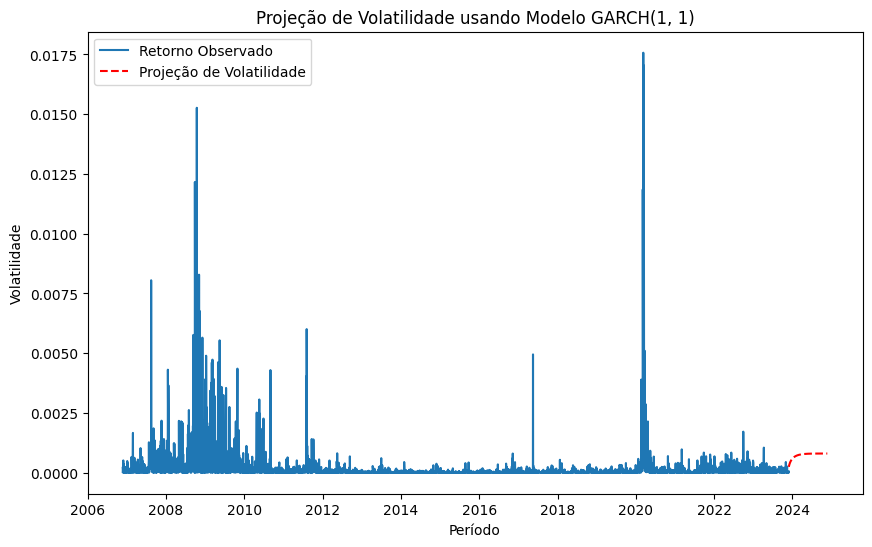

In [317]:
# Criar um gráfico da volatilidade condicional projetada
from datetime import timedelta
plt.figure(figsize=(10, 6))
plt.plot(resto1, label='Retorno Observado')
plt.plot(lista_de_datas, vol_1, label='Projeção de Volatilidade', linestyle='--', color='red')
plt.title('Projeção de Volatilidade usando Modelo GARCH(1, 1)')
plt.xlabel('Período')
plt.ylabel('Volatilidade')
plt.legend()
plt.savefig('Projeção_vol_1.png')
plt.show()

In [318]:
ajuste = model_garch_fit_2
# Realizar projeção para os próximos 120 dias
projecao = ajuste.forecast(start=0, horizon=360)

# Extrair volatilidade condicional da projeção
volatilidade_condicional = np.sqrt(projecao.variance.dropna())

vol_2 = volatilidade_condicional.iloc[1]

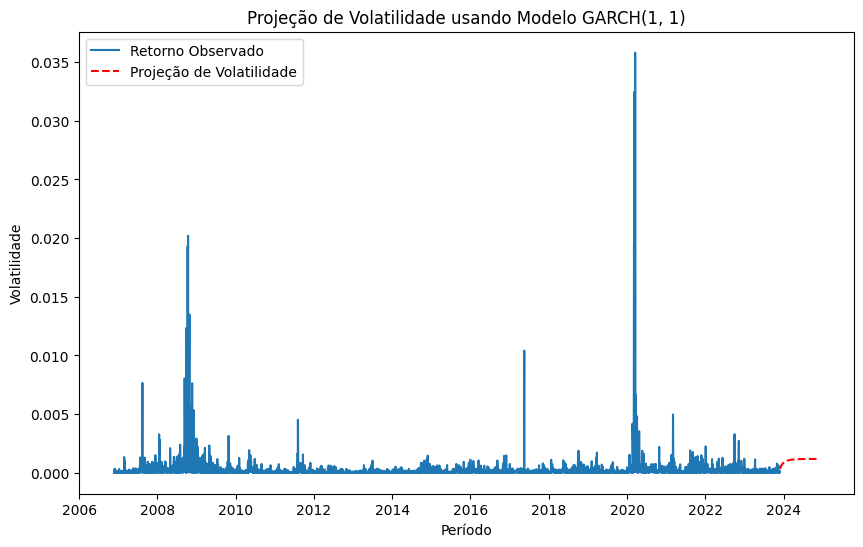

In [319]:
plt.figure(figsize=(10, 6))
plt.plot(resto2, label='Retorno Observado')
plt.plot(lista_de_datas, vol_2, label='Projeção de Volatilidade', linestyle='--', color='red')
plt.title('Projeção de Volatilidade usando Modelo GARCH(1, 1)')
plt.xlabel('Período')
plt.ylabel('Volatilidade')
plt.legend()
plt.savefig('Projeção_vol_2.png')
plt.show()